<a href="https://colab.research.google.com/github/juniobarret/Area-de-Testes/blob/main/Trabalho%20K-Means%20-%20Dataset%20sobre%20Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset: Conjunto de dados de Qualidade do Vinho

 link: https://www.kaggle.com/datasets/iamsouravbanerjee/planet-dataset

Este quadro de dados contém as seguintes colunas:

Variáveis ​​de entrada (com base em testes físico-químicos):

1 - acidez fixa

2 - acidez volátil

3 - ácido cítrico

4 - açúcar residual

5 - cloretos

6 - dióxido de enxofre livre

7 - dióxido de enxofre total

8 - densidade

9 - pH

10 - sulfatos

11 - álcool

12 - qualidade (pontuação entre 0 e 10)

In [37]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
# Carregando o conjunto de dados sobre vinhos
data = pd.read_csv("/content/Wine.csv")

# Traduzindo os nomes das colunas
data.columns = ['AcidezFixa', 'AcidezVolatil', 'AcidoCitrico', 'AcucarResidual',
                'Cloridos', 'DioxidoEnxofreLivre', 'DioxidoEnxofreTotal',
                'Densidade', 'pH', 'Sulfatos', 'Alcool', 'TipoVinho', 'Qualidade']


In [39]:
# Visualizando as primeiras linhas do conjunto de dados
print(data.head())

   AcidezFixa  AcidezVolatil  AcidoCitrico  AcucarResidual  Cloridos  \
0         7.4           0.70          0.00             1.9     0.076   
1         7.8           0.88          0.00             2.6     0.098   
2         7.8           0.76          0.04             2.3     0.092   
3        11.2           0.28          0.56             1.9     0.075   
4         7.4           0.70          0.00             1.9     0.076   

   DioxidoEnxofreLivre  DioxidoEnxofreTotal  Densidade    pH  Sulfatos  \
0                 11.0                 34.0     0.9978  3.51      0.56   
1                 25.0                 67.0     0.9968  3.20      0.68   
2                 15.0                 54.0     0.9970  3.26      0.65   
3                 17.0                 60.0     0.9980  3.16      0.58   
4                 11.0                 34.0     0.9978  3.51      0.56   

   Alcool  TipoVinho  Qualidade  
0     9.4          5          0  
1     9.8          5          1  
2     9.8          5

In [40]:
# Selecionando apenas 3 features relevantes para a análise
features = ['Alcool', 'AcidezVolatil', 'AcidoCitrico']
X = data[features]


Selecionei estas features porque, como não há indicação de cor, estas caraterísticas prevalecem para seleção dos vinhos tintos , de acordo com o blog.vineria9.com.br.

fonte: https://blog.vineria9.com.br/vinho-tinto-tudo-que-voce-precisa-saber-sobre/

In [41]:
# Normalizando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

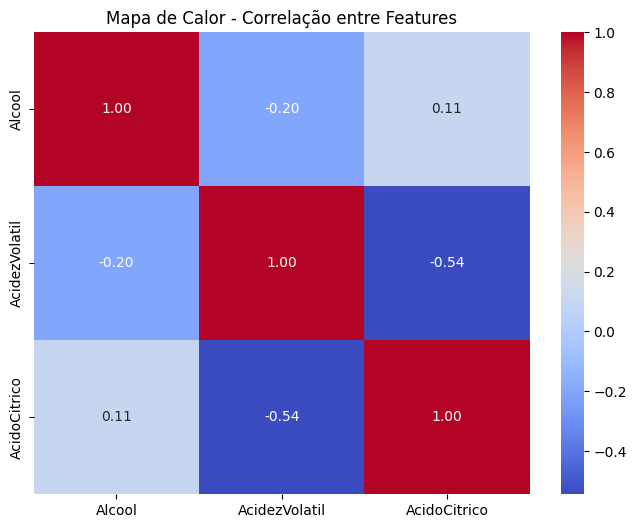

In [42]:
# Plotando um mapa de calor para visualizar a correlação entre as features
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor - Correlação entre Features')
plt.show()

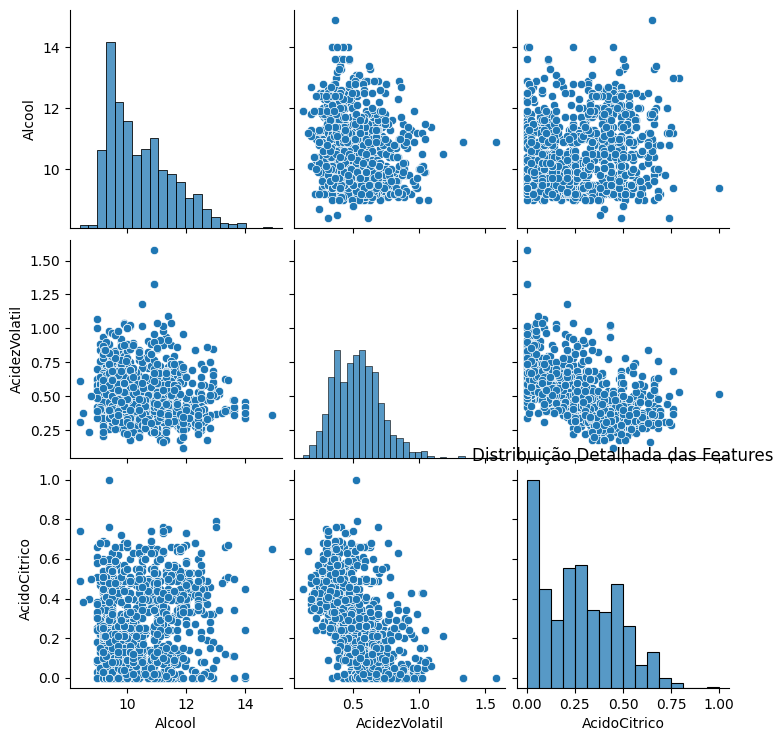

In [43]:
# Plotando uma distribuição detalhada das features
sns.pairplot(data=X)
plt.title('Distribuição Detalhada das Features')
plt.show()

In [44]:
# Normalizando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

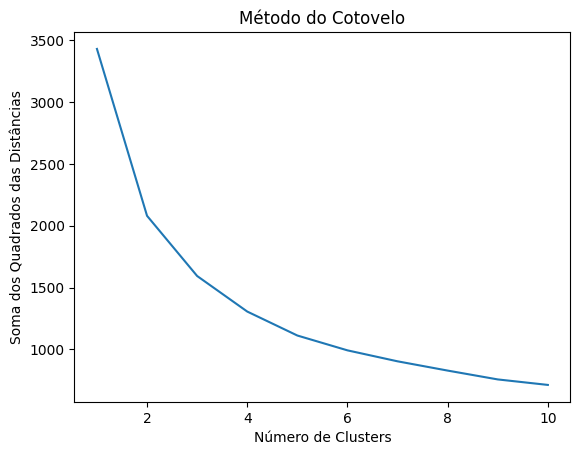

In [56]:
# Usando o método do cotovelo para encontrar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.show()


In [57]:
# Escolhendo o número de clusters com base no método do cotovelo
num_clusters = 3

In [46]:
# Aplicando o algoritmo KMeans para clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Obtendo os centros dos clusters
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
# Adicionando as previsões de clusters ao conjunto de dados
data['Cluster'] = kmeans.labels_

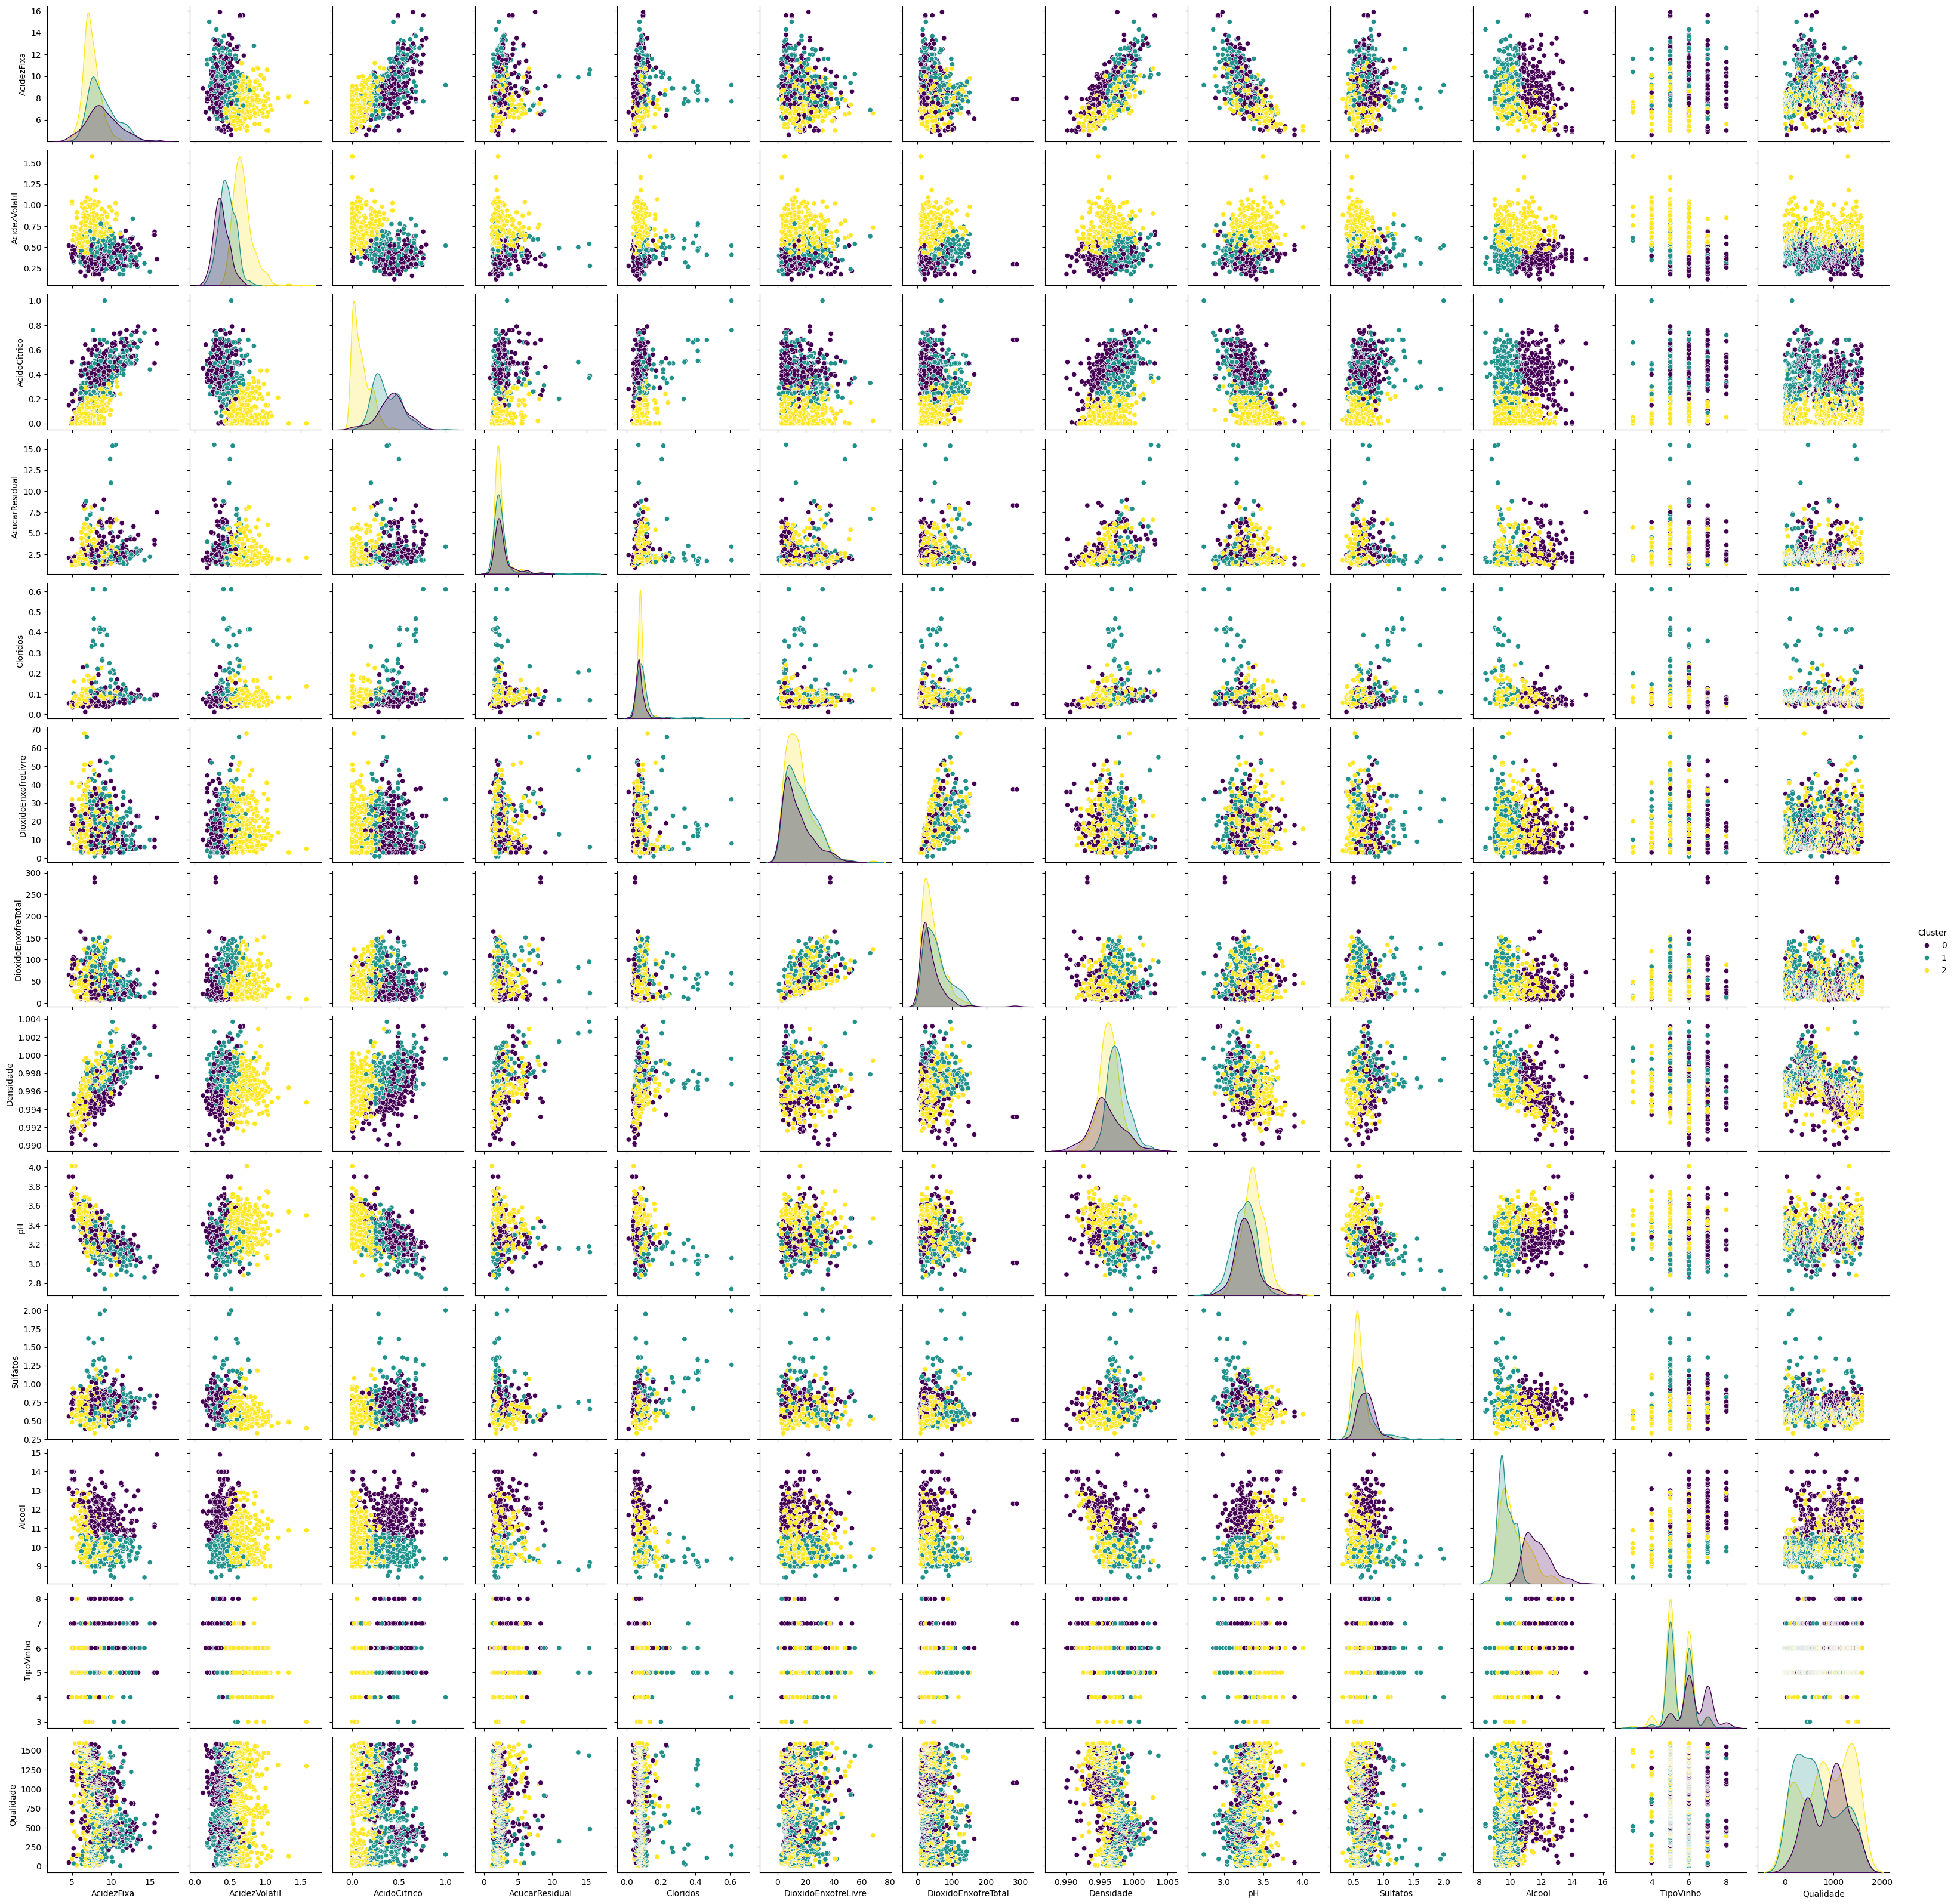

In [48]:
# Exibindo os resultados do clustering
sns.pairplot(data=data, hue='Cluster', palette='viridis')
plt.show()

In [49]:
# Exibindo a contagem de cada tipo de vinho em cada cluster
print(data.groupby(['Cluster', 'TipoVinho']).size())

Cluster  TipoVinho
0        4              3
         5             35
         6            126
         7            101
         8             13
1        3              2
         4              7
         5            204
         6            153
         7             22
         8              2
2        3              4
         4             23
         5            244
         6            183
         7             20
         8              1
dtype: int64


In [50]:
# Identificando os tipos de vinho em cada cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_df)

      Alcool  AcidezVolatil  AcidoCitrico
0  11.743046       0.378094      0.429928
1   9.729582       0.459309      0.365550
2  10.266878       0.680633      0.093439


In [51]:
# Gerando dados aleatórios para um estudo de caso final
random_data = pd.DataFrame(np.random.rand(10, len(features)), columns=features)

In [52]:
# Normalizando os dados aleatórios
random_data_scaled = scaler.transform(random_data)

In [53]:
# Fazendo previsões para os dados aleatórios
predictions = kmeans.predict(random_data_scaled)

In [54]:
# 3. Realizar previsões
# Vamos criar uma função que recebe os valores das características como entrada e retorna o tipo de vinho com base nos clusters identificados
def identificar_tipo_vinho(alcool, acidez_volatil, acido_citrico):
    # Normalizando os valores de entrada
    alcool_scaled = (alcool - scaler.mean_[0]) / scaler.scale_[0]
    acidez_volatil_scaled = (acidez_volatil - scaler.mean_[1]) / scaler.scale_[1]
    acido_citrico_scaled = (acido_citrico - scaler.mean_[2]) / scaler.scale_[2]
    # Realizando previsão do cluster
    cluster = kmeans.predict([[alcool_scaled, acidez_volatil_scaled, acido_citrico_scaled]])
    # Atribuindo rótulo ao tipo de vinho com base no cluster
    if cluster == 0:
        tipo_vinho = "Vinho Tinto"
    elif cluster == 1:
        tipo_vinho = "Vinho Branco"
    elif cluster == 2:
        tipo_vinho = "Vinho Rosé"
    else:
        tipo_vinho = "Tipo de vinho não identificado"
    return tipo_vinho, cluster[0]

# função para identificar o tipo de vinho com base nas características fornecidas
alcool = 12.5
acidez_volatil = 0.5
acido_citrico = 0.4
tipo_vinho, cluster = identificar_tipo_vinho(alcool, acidez_volatil, acido_citrico)
print(f"Para um vinho com teor de álcool de {alcool}% , acidez volátil de {acidez_volatil} e acido citrico de {acido_citrico}, o tipo de vinho identificado é: {tipo_vinho} (Cluster {cluster})")


Para um vinho com teor de álcool de 12.5% , acidez volátil de 0.5 e acido citrico de 0.4, o tipo de vinho identificado é: Vinho Tinto (Cluster 0)


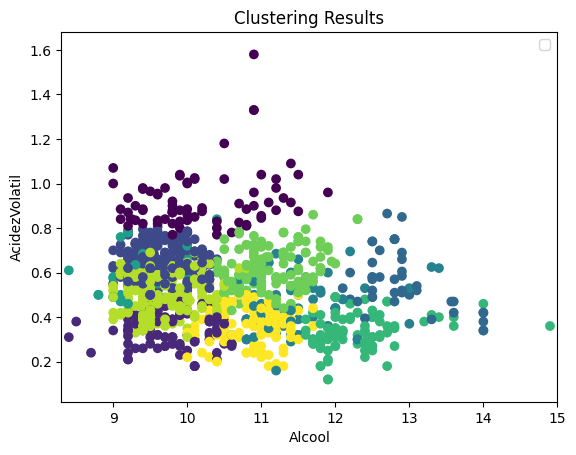

In [60]:
# Definindo os limites dos eixos x e y para garantir que os pontos e os centros dos clusters sejam exibidos de forma mais próxima
plt.xlim(X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1)
plt.ylim(X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1)

# Visualizando os resultados do clustering nos dados originais
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_


plt.xlabel('Alcool')
plt.ylabel('AcidezVolatil')
plt.title('Clustering Results')
plt.legend()
plt.show()